In [1]:
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import numpy as np
sns.set_theme()
#df = sns.load_dataset("penguins")
diamonds = sns.load_dataset('diamonds')




#df.replace([np.inf, -np.inf], np.nan, inplace=True)
diamonds.replace([np.inf, -np.inf], np.nan, inplace=True)

In [2]:
diamonds.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#mean
diamonds['carat'].mean()

0.7979397478680014

In [5]:
diamonds['carat'].mode

<bound method Series.mode of 0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64>

In [6]:
#median
diamonds['carat'].median()

0.7

In [7]:
#measure of dispersion
#standard deviation
diamonds['carat'].std()

0.47401124440538067

In [8]:
#shows if carat has positive or negative relationship with the other variables
#variance
diamonds['carat'].var()


0.22468665982273753

In [9]:
#variance Mattix. Show relationship as positive or negatice 
diamonds.var(numeric_only=True)

carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
price    1.591563e+07
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
dtype: float64

In [10]:
#measure the peakedness of the distribution
#3 is normal peakedness
diamonds['carat'].kurt()

1.2566353326079294

In [11]:
#descriptive stats on the diamond series

diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [12]:
#descriptive stats on the data frame

diamonds.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
#outlier cutoff

Q1 = diamonds['carat'].quantile(.025)

Q3 = diamonds['carat'].quantile(.075)


IQR = Q3-Q1



upper_outliers = Q3 + 1.5*IQR
lower_outliers = Q1 - 1.5*IQR



print(upper_outliers,  lower_outliers)



0.32999999999999996 0.2500000000000001


<Axes: xlabel='carat', ylabel='Count'>

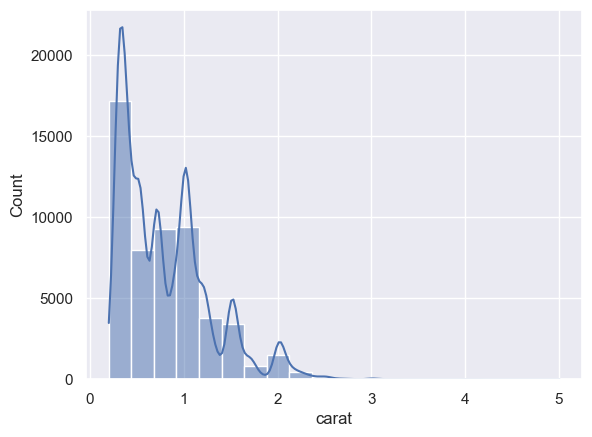

In [14]:
# Distribution of Carats over the DF to show concentrations (density as y) not to be confused
# as Destiny, which is attibutable to Destiny's Child

#Counts by Bins  Histogram. limit to 20 bins add a Kernel Density Element, not to be confused with 
# Colonel Sanders who founded KFC.

sns.histplot(diamonds["carat"],bins=20,kde=True)



<Axes: xlabel='carat', ylabel='Density'>

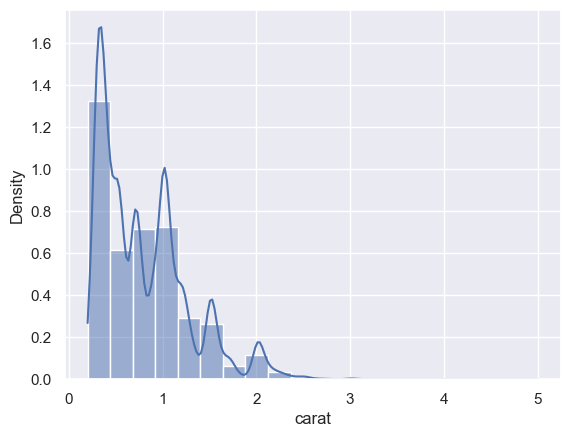

In [15]:

# Distribution of Carats over the DF to show concentrations (density as y) not to be confused
# as Destiny, which is attibutable to Destiny's Child

#Counts by Bins  Histogram. limit to 20 bins add a Kernel Density Element, not to be confused with 
# Colonel Sanders who founded KFC.
#measure on Density

sns.histplot(diamonds["carat"],stat="density",bins=20,kde=True)


In [16]:
#multivarate
np.cov(diamonds['depth'], diamonds['carat'])



#diamonds.variance()


array([[2.05240384, 0.01916653],
       [0.01916653, 0.22468666]])

In [17]:
#covariance matrix
diamonds.cov(numeric_only=True)




,carat,depth,table,price,x,y,z
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


In [18]:
np.corrcoef(diamonds['depth'], diamonds['carat'])

array([[1.        , 0.02822431],
       [0.02822431, 1.        ]])

In [19]:
diamonds.corr(numeric_only=True)


#diamonds_short = diamonds[['depth','carat']]

#sns.relplot(data=diamonds_short, kind="scatter")




,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: xlabel='carat', ylabel='depth'>

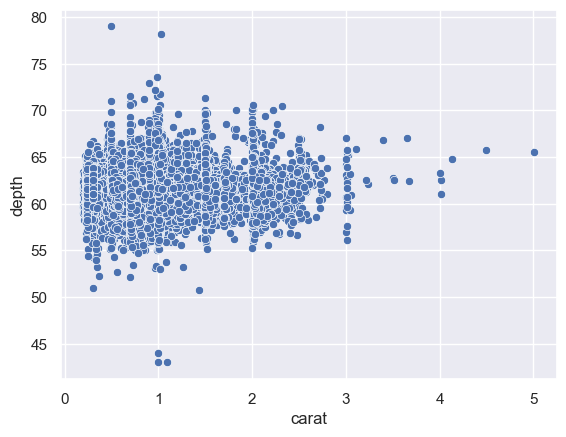

In [20]:
#Scatter to show relationship btw carat and depth

sns.scatterplot(x='carat', y='depth', data=diamonds)

<Axes: xlabel='depth', ylabel='carat'>

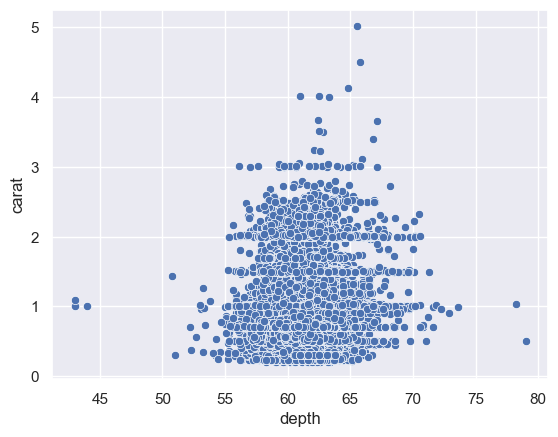

In [21]:
#Scatter to show relationship btw depth and carat

sns.scatterplot(x='depth', y='carat', data=diamonds)

<Axes: xlabel='depth', ylabel='price'>

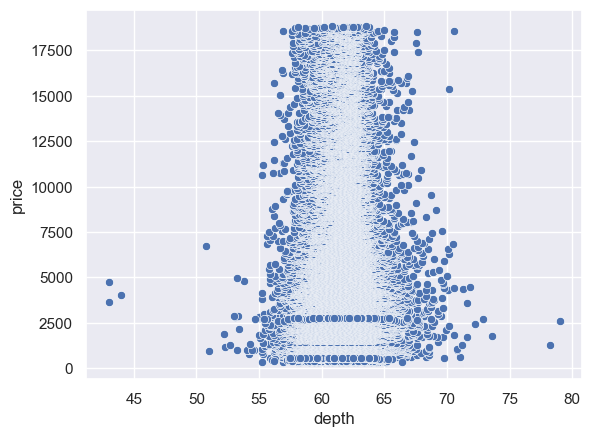

In [22]:
#take a look at depth and price


sns.scatterplot(x='depth', y='price', data=diamonds)

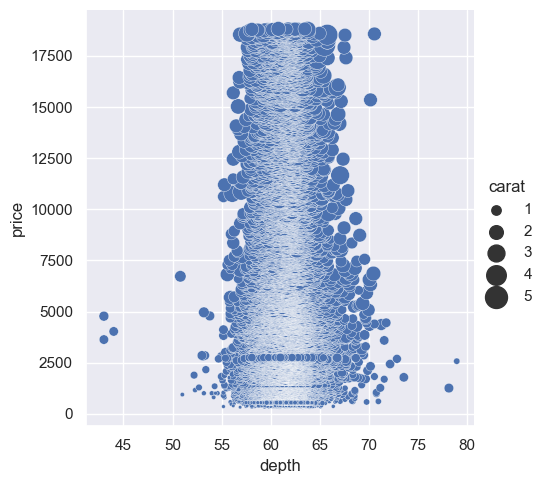

In [23]:
#replot reproduces the two scatter points for depth and price but highlights
#size on the carat size

sns.relplot(
    data=diamonds, x="depth", y="price", size="carat",sizes=(5,250)
    
)